<a href="https://colab.research.google.com/github/hoanguyen071710/Uber-and-Lyft-EDA-and-price-prediction/blob/main/Uber_and_Lyft_simple_EDA_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/AI Specialist for Data Scientist/Practice/Uber and Lyft'

In [ ]:
import os
os.chdir(path)
os.listdir()

['rideshare_kaggle.csv',
 'Uber and Lyft - Taxi Fare Prediction.ipynb',
 'uber_taxi_boston_price.csv',
 'uber_taxi_boston_min_price.csv',
 'Web Scrap Uber taxi price Boston.ipynb']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max.columns',100)
pd.set_option('max.rows',500)

In [ ]:
data = pd.read_csv('rideshare_kaggle.csv')

# Data Cleaning

In [ ]:
display(data.head(3))
display(data.shape)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


(693071, 57)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
# Select columns for EDA
df = data[['id','hour','day','month','datetime', 'source','destination','cab_type','product_id','name','distance','price','surge_multiplier','temperature','short_summary','long_summary']]
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,distance,price,surge_multiplier,temperature,short_summary,long_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,5.0,1.0,42.34,Mostly Cloudy,Rain throughout the day.
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,11.0,1.0,43.58,Rain,"Rain until morning, starting again in the eve..."
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,7.0,1.0,38.33,Clear,Light rain in the morning.
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,26.0,1.0,34.38,Clear,Partly cloudy throughout the day.
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,9.0,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                693071 non-null  object 
 1   hour              693071 non-null  int64  
 2   day               693071 non-null  int64  
 3   month             693071 non-null  int64  
 4   datetime          693071 non-null  object 
 5   source            693071 non-null  object 
 6   destination       693071 non-null  object 
 7   cab_type          693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
 10  distance          693071 non-null  float64
 11  price             637976 non-null  float64
 12  surge_multiplier  693071 non-null  float64
 13  temperature       693071 non-null  float64
 14  short_summary     693071 non-null  object 
 15  long_summary      693071 non-null  object 
dtypes: float64(4), int64

In [ ]:
# Convert datetime to datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,distance,price,surge_multiplier,temperature,short_summary,long_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,5.0,1.0,42.34,Mostly Cloudy,Rain throughout the day.
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,11.0,1.0,43.58,Rain,"Rain until morning, starting again in the eve..."
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,7.0,1.0,38.33,Clear,Light rain in the morning.
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,26.0,1.0,34.38,Clear,Partly cloudy throughout the day.
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,9.0,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.


In [ ]:
df.describe()

,hour,day,month,distance,price,surge_multiplier,temperature
count,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,2.189430,16.545125,1.013870,39.584388
std,6.948114,9.982286,0.492429,1.138937,9.324359,0.091641,6.726084
min,0.000000,1.000000,11.000000,0.020000,2.500000,1.000000,18.910000
25%,6.000000,13.000000,11.000000,1.280000,9.000000,1.000000,36.450000
50%,12.000000,17.000000,12.000000,2.160000,13.500000,1.000000,40.490000
75%,18.000000,28.000000,12.000000,2.920000,22.500000,1.000000,43.580000
max,23.000000,30.000000,12.000000,7.860000,97.500000,3.000000,57.220000


In [ ]:
# Check duplicate data
df[df.duplicated()]

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,distance,price,surge_multiplier,temperature,short_summary,long_summary


In [ ]:
# Check null value
df.isnull().sum()

id                      0
hour                    0
day                     0
month                   0
datetime                0
source                  0
destination             0
cab_type                0
product_id              0
name                    0
distance                0
price               55095
surge_multiplier        0
temperature             0
short_summary           0
long_summary            0
dtype: int64

In [ ]:
# Check id columns
df['id'].value_counts().sort_values(ascending = False)

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
4f9fee41-fde3-4767-bbf1-a00e108701fb    1
c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a    1
18d580ac-c91a-4b6d-aa75-ab62566f713e    1
981a3613-77af-4620-a42a-0c0866077d1e    1
                                       ..
64a50889-d05b-49de-b416-1802db5c27ac    1
6c1d9207-a9af-431e-a65f-3d9d205f28bf    1
25ed29df-4f9c-4aac-8218-681427f1d738    1
353e6566-b272-479e-a9c6-98bd6cb23f25    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 693071, dtype: int64

In [ ]:
# Check if hour, day, month columns are correct with datetime column
print((df['datetime'].dt.hour == df['hour']).mean())
print((df['datetime'].dt.day == df['day']).mean())
print((df['datetime'].dt.month == df['month']).mean())

1.0
1.0
1.0


In [ ]:
# Check unique value of 'source'
df['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [ ]:
# Check 'destination'
df['destination'].value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [ ]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [ ]:
# Check 'cab_type'
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [ ]:
# Check 'product_id'
df['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [ ]:
# Check 'name'
df['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [ ]:
# There are some strange values in product_id
# Most notably none of them have Uber in their names
# Check what cab_type these product_id are from
strange_prod_id = df['product_id'].value_counts().index[0:7]
normal_prod_id = df['product_id'].value_counts().index[7:]
df[df['product_id'].isin(strange_prod_id)]['name'].value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

In [ ]:
df[['product_id','name']].value_counts()

product_id                            name        
6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV       55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL          55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d  WAV             55096
6c84fd89-3f11-4782-9b50-97c468b19529  Black           55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi            55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX           55094
997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool        55091
lyft                                  Lyft            51235
lyft_lux                              Lux Black       51235
lyft_luxsuv                           Lux Black XL    51235
lyft_plus                             Lyft XL         51235
lyft_premier                          Lux             51235
lyft_line                             Shared          51233
dtype: int64

In [ ]:
# Eliminate product_id columns
# Due to each name can already be seen as a unique product_id, with each product_id only match one name
df = df.drop(columns = 'product_id')

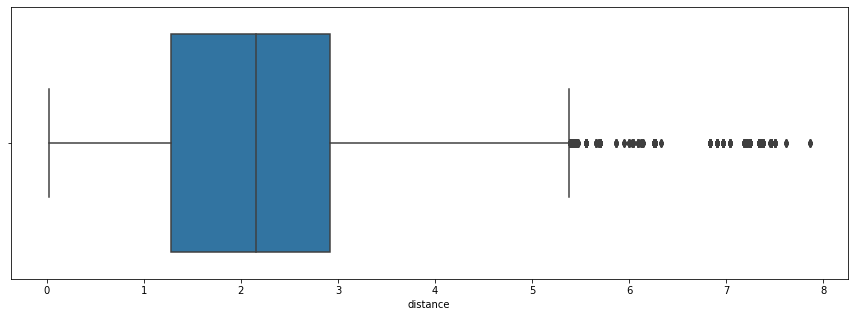

In [ ]:
# Check outlier of distance
plt.figure(figsize = (15,5))
sns.boxplot(data = df,
             x = 'distance')

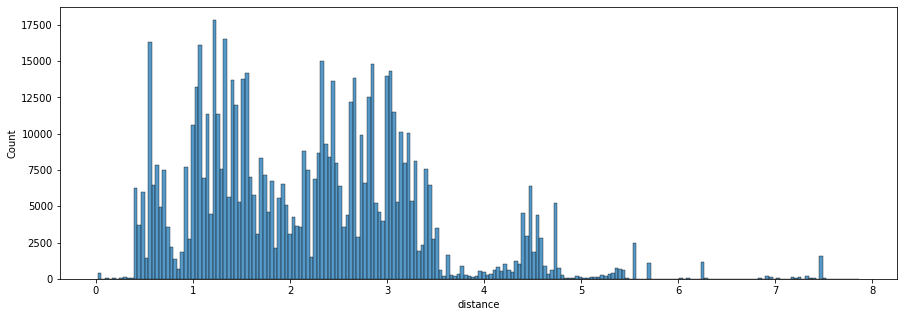

In [ ]:
# Check distribution of distance
plt.figure(figsize = (15,5))
sns.histplot(data = df,
             x = 'distance')

In [ ]:
# Identify outliers
q1_distance = np.quantile(df['distance'], 0.25)
q3_distance = np.quantile(df['distance'], 0.75)
iqr_distance = q3_distance - q1_distance
lower_distance = q1_distance - 1.5*iqr_distance
upper_distance = q3_distance + 1.5*iqr_distance
upper_distance_df = df[df['distance'] > upper_distance]
lower_distance_df = df[df['distance'] < upper_distance]

In [ ]:
# Eliminate outlier distance from data
df = df[(df['distance'] > lower_distance) & (df['distance'] < upper_distance)]

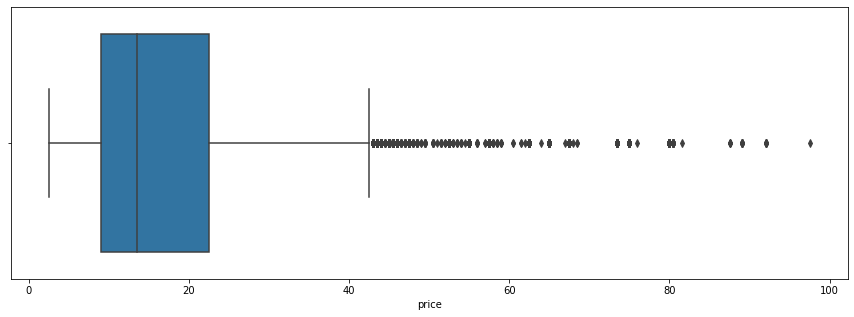

In [ ]:
# Check distribution of price
plt.figure(figsize = (15,5))
sns.boxplot(data = df,
             x = 'price')

In [ ]:
# Check where price is null
null_price_df = df[df['price'].isnull()]
null_price_df

,id,hour,day,month,datetime,source,destination,cab_type,name,distance,price,surge_multiplier,temperature,short_summary,long_summary
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,14,1,12,2018-12-01 14:13:04,North End,West End,Uber,Taxi,1.11,NaN,1.0,36.99,Partly Cloudy,Light rain in the morning and overnight.
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,23,2,12,2018-12-02 23:52:56,Beacon Hill,South Station,Uber,Taxi,2.48,NaN,1.0,48.83,Overcast,Light rain until evening.
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,20,29,11,2018-11-29 20:38:05,North Station,Fenway,Uber,Taxi,2.94,NaN,1.0,42.50,Partly Cloudy,Partly cloudy throughout the day.
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,20,13,12,2018-12-13 20:10:16,North End,West End,Uber,Taxi,1.16,NaN,1.0,33.15,Mostly Cloudy,Partly cloudy throughout the day.
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,13,30,11,2018-11-30 13:08:03,North End,Beacon Hill,Uber,Taxi,2.67,NaN,1.0,31.80,Clear,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,15,15,12,2018-12-15 15:15:13,South Station,Beacon Hill,Uber,Taxi,2.50,NaN,1.0,50.71,Mostly Cloudy,Mostly cloudy throughout the day.
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1,29,11,2018-11-29 01:47:08,Haymarket Square,Beacon Hill,Uber,Taxi,0.91,NaN,1.0,38.42,Mostly Cloudy,Mostly cloudy throughout the day.
693049,885ef635-299e-45cf-8052-c45a39e9822a,1,29,11,2018-11-29 01:47:08,North End,Beacon Hill,Uber,Taxi,1.79,NaN,1.0,38.42,Mostly Cloudy,Mostly cloudy throughout the day.
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,5,2,12,2018-12-02 05:28:04,Theatre District,Haymarket Square,Uber,Taxi,1.61,NaN,1.0,38.19,Overcast,Light rain until evening.


In [ ]:
# Seems that null values 'cab_type' and 'name'
print(null_price_df['cab_type'].value_counts())
print(null_price_df['name'].value_counts())

Uber    54053
Name: cab_type, dtype: int64
Taxi    54053
Name: name, dtype: int64


In [ ]:
# Check columns rows where cab_type = 'Uber' and name = 'taxi'
df[(df['cab_type'] == 'Uber') & (df['name'] == 'Taxi')]['price'].isnull().sum()

54053

In [ ]:
# Impute scraped data from scraped uber taxi price in Boston
imputed_price = pd.read_csv('uber_taxi_boston_min_price.csv').drop(columns = 'Unnamed: 0')
imputed_price['price'] = imputed_price['price'].str.strip('$').astype('float')
imputed_price

,source,destination,price
0,Back Bay,Boston University,2.6
1,Back Bay,Fenway,2.6
2,Back Bay,Haymarket Square,2.6
3,Back Bay,North End,2.6
4,Back Bay,Northeastern University,2.6
5,Back Bay,South Station,2.6
6,Beacon Hill,Boston University,2.6
7,Beacon Hill,Fenway,2.6
8,Beacon Hill,Haymarket Square,2.6
9,Beacon Hill,North End,2.6


In [ ]:
# Impute missing value based on web scrap df
# Due to web scraping results seems incorrect and from a different time period compare to the dataset
# Remove rows with Uber Taxi
df = df.drop(index = df[(df['cab_type'] == 'Uber') & (df['name'] == 'Taxi')].index)

In [ ]:
df.isnull().sum()

id                  0
hour                0
day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
name                0
distance            0
price               0
surge_multiplier    0
temperature         0
short_summary       0
long_summary        0
dtype: int64

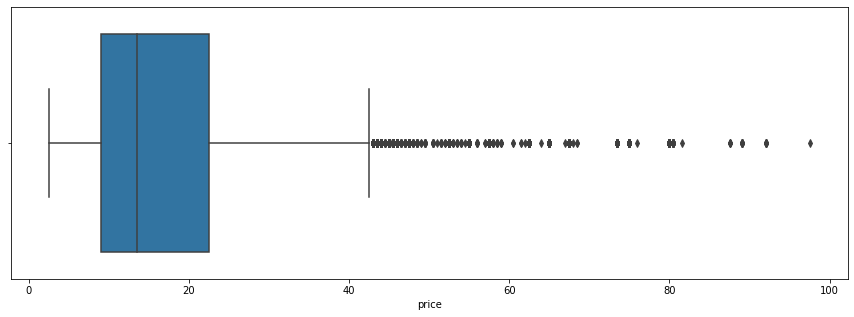

In [ ]:
# Check price boxplot
plt.figure(figsize = (15,5))
sns.boxplot(data = df,
            x = 'price')

In [ ]:
# Check for price outliers
q1_price = np.quantile(df['price'], 0.25)
q3_price = np.quantile(df['price'], 0.75)
iqr_price = q3_price - q1_price
upper_price = q3_price + 1.5*iqr_price
lower_price = q1_price - 1.5*iqr_price
# Seperate high and low price for later analysis
upper_price_df = df[df['price'] > upper_price]
lower_price_df = df[df['price'] < lower_price]

In [ ]:
df = df[(df['price'] > lower_price) & (df['price'] < upper_price)]

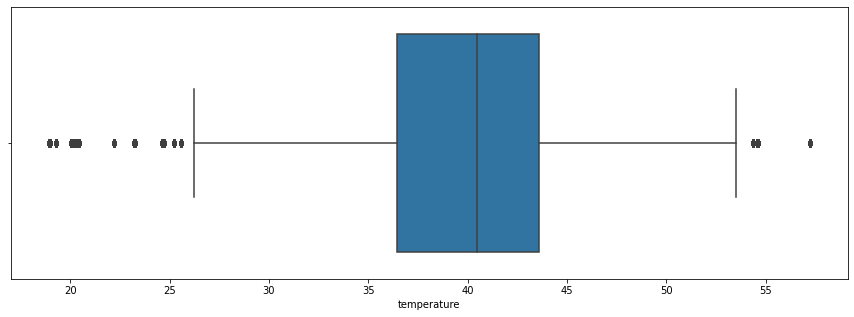

In [ ]:
# Check temperature outlier
plt.figure(figsize = (15,5))
sns.boxplot(data = df,
            x = 'temperature')

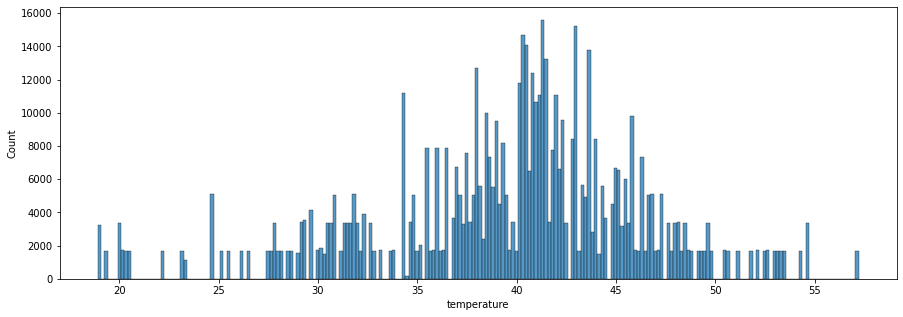

In [ ]:
# Check temperature distribution
plt.figure(figsize = (15,5))
sns.histplot(data = df,
             x = 'temperature')

In [ ]:
# Check for price outliers
q1_temp= np.quantile(df['temperature'], 0.25)
q3_temp = np.quantile(df['temperature'], 0.75)
iqr_temp = q3_temp - q1_temp
upper_temp = q3_temp + 1.5*iqr_temp
lower_temp = q1_temp - 1.5*iqr_temp
# Seperate high and low price for later analysis
upper_temp_df = df[df['temperature'] > upper_temp]
lower_temp_df = df[df['temperature'] < lower_temp]

In [ ]:
df = df[(df['temperature'] > lower_temp) & (df['temperature'] < upper_temp)]

In [ ]:
# Check value of col 'short_summary'
df['short_summary'].value_counts()

 Overcast             195847
 Mostly Cloudy        121851
 Partly Cloudy        106661
 Clear                 65844
 Light Rain            49497
 Rain                  21370
 Possible Drizzle      16838
 Foggy                  8150
 Drizzle                6617
Name: short_summary, dtype: int64

# EDA

In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,name,distance,price,surge_multiplier,temperature,short_summary,long_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,5.0,1.0,42.34,Mostly Cloudy,Rain throughout the day.
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,11.0,1.0,43.58,Rain,"Rain until morning, starting again in the eve..."
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0,1.0,38.33,Clear,Light rain in the morning.
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0,1.0,34.38,Clear,Partly cloudy throughout the day.
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.


In [ ]:
# Add columns weekday for more insights
df['weekday'] = df['datetime'].dt.day_name()

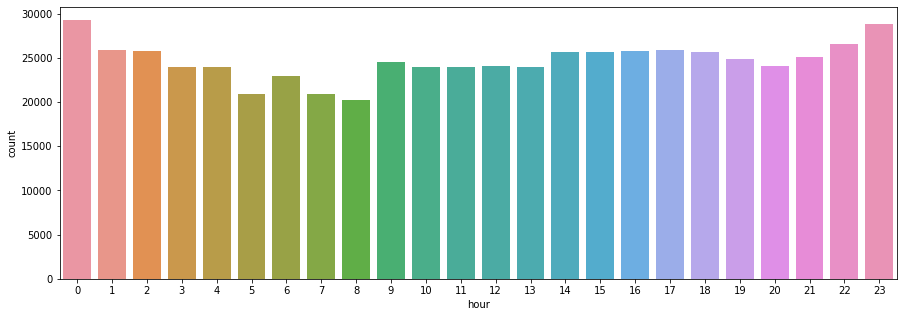

In [ ]:
# Check month count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'hour')

Travelling density among the hours of the day seems to be somewhat even throughout

However, their are sligt increase in midnight

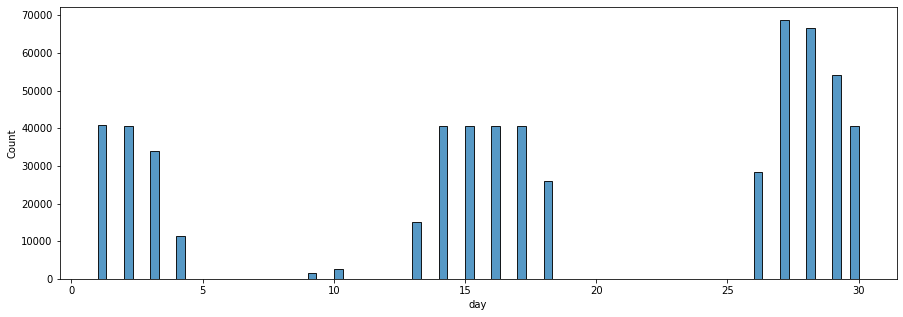

In [ ]:
# Check days count
plt.figure(figsize = (15,5))
sns.histplot(data = df,
              x = 'day')

There are less ride earlier of the month compare to the end of the month, bottms out just before mid of month and peaked around the last few days of the month

Furthermore, some of the day seems to have no data at all (5 - 8, 19 - 25)

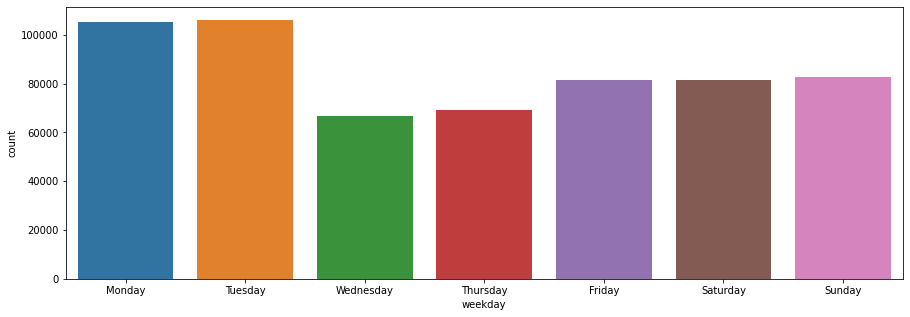

In [ ]:
# Check weekdays count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'weekday',
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Monday and Tuesday tend to have the most customers, the rest of the weekdays seems almost equal

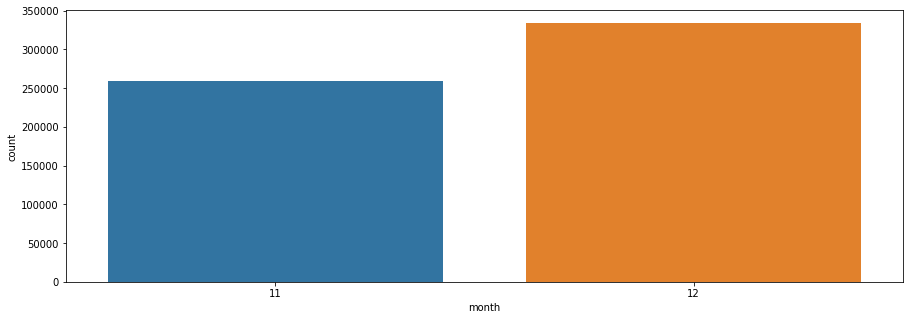

In [ ]:
# Check month count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'month')

December 2018 had higher customer counts compare to November 2018

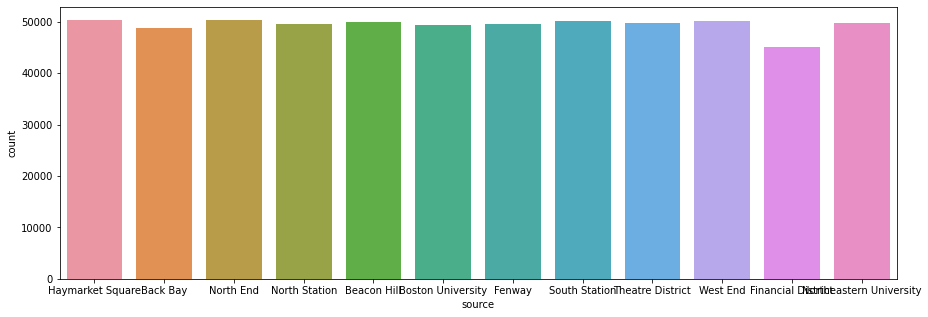

In [ ]:
# Check source count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'source')

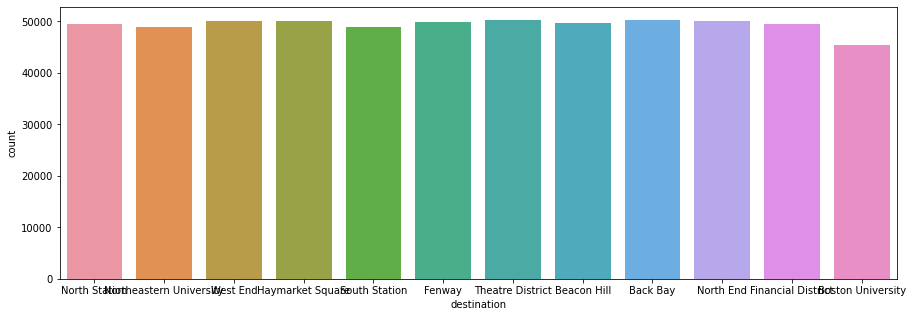

In [ ]:
# Check destiation count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'destination')

Pretty much all locations in are source and destination nearly equal to each other

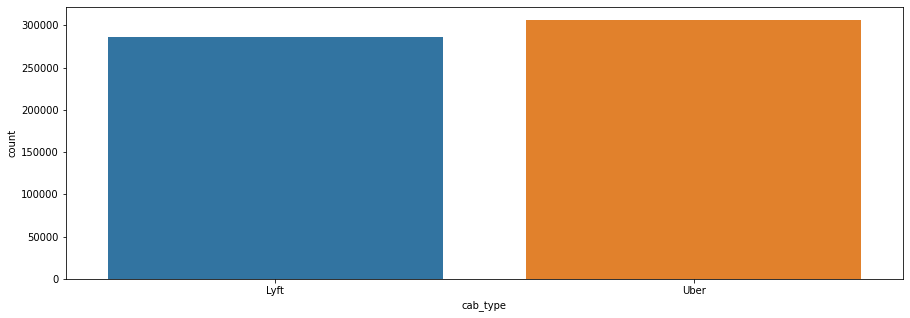

In [ ]:
# Check cab type count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'cab_type')

Seems that for in this dataset, Uber is a more popular choice among customers

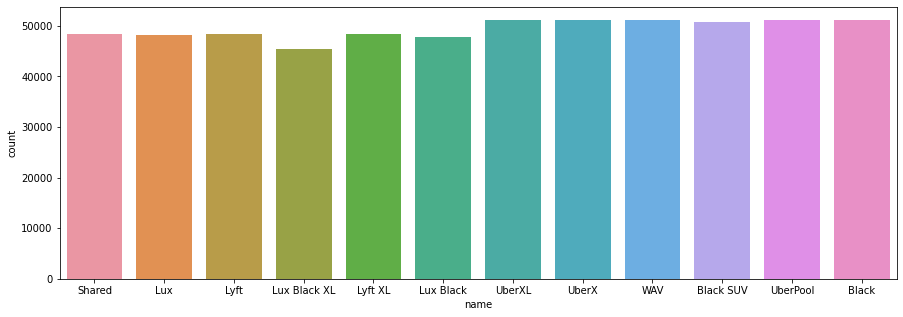

In [ ]:
# Check name count
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'name')

Some of the sub categories of Lyft cab is a bit lower than that of Uber's, which may explain the fewer customers of Lyft compared to Uber

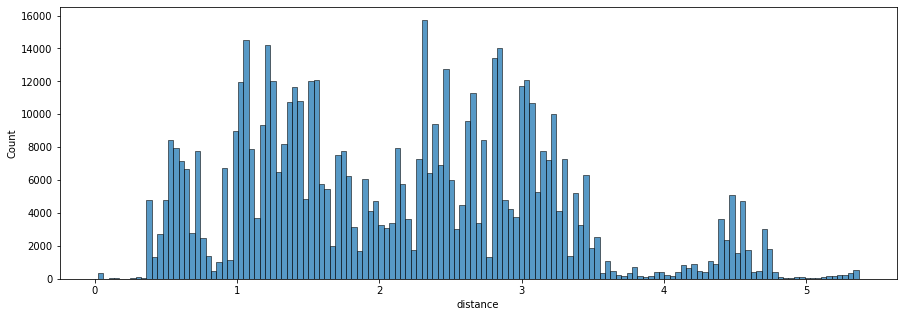

In [ ]:
# Check distance distribution
plt.figure(figsize = (15,5))
sns.histplot(data = df,
              x = 'distance')

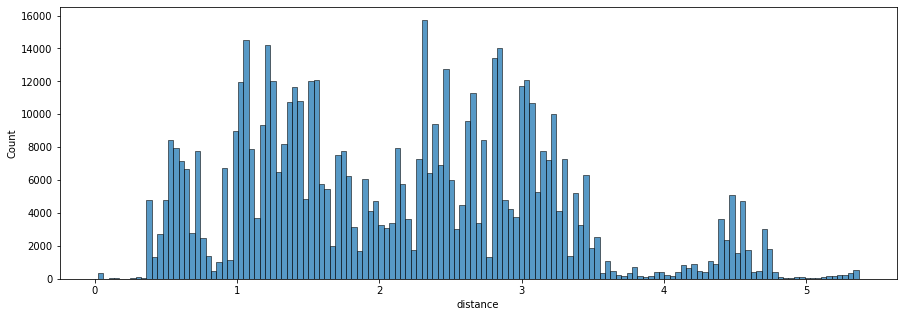

In [ ]:
plt.figure(figsize = (15,5))
sns.histplot(data = df,
              x = 'distance')

Despite the unsmoothness, the majority of the distance around 1 to 3

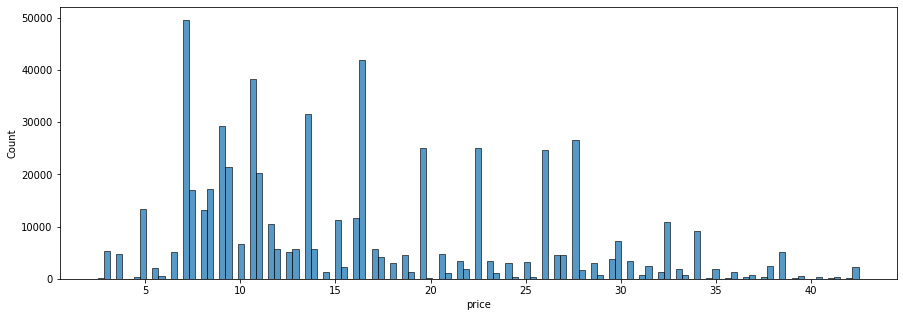

In [ ]:
# Check distance distribution
plt.figure(figsize = (15,5))
sns.histplot(data = df,
              x = 'price')

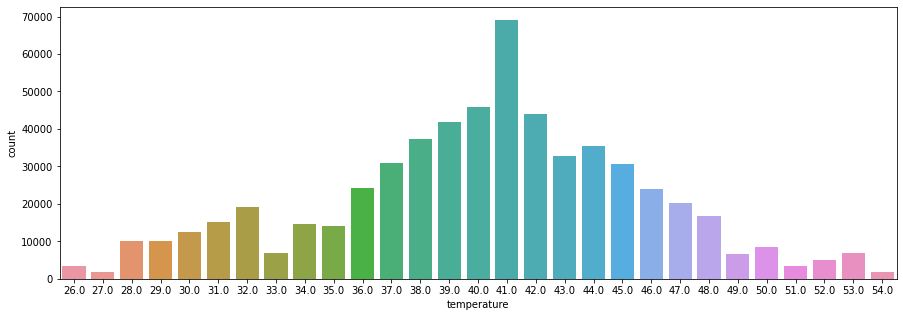

In [ ]:
# Check temperature distribution
df['temperature'] = round(df['temperature'])
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'temperature')

Ideal temperature when people tend to call for taxi is around 41 degree

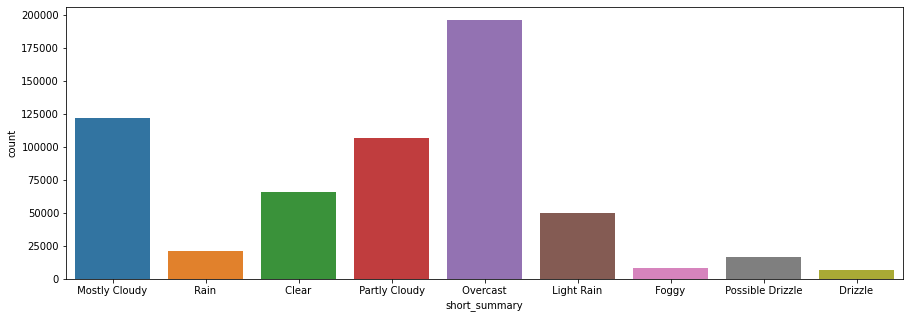

In [ ]:
# Check short summary description
plt.figure(figsize = (15,5))
sns.countplot(data = df,
              x = 'short_summary')

Most people prefer taxi rides in overcast weather or cloudy

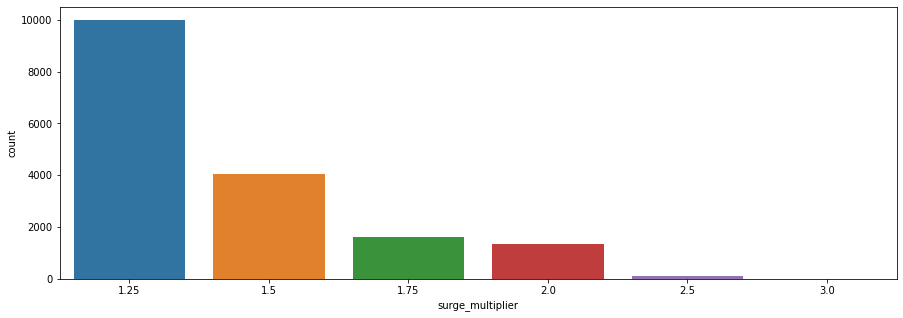

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df[df['surge_multiplier'] > 1],
            x = 'surge_multiplier')

Aside from 1, surge mulitiplier at 1.25 is the most common

## Bivariate/ Multivariate

### Question: What is the element that affect price

In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,name,distance,price,surge_multiplier,temperature,short_summary,long_summary,weekday
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,5.0,1.0,42.0,Mostly Cloudy,Rain throughout the day.,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,11.0,1.0,44.0,Rain,"Rain until morning, starting again in the eve...",Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0,1.0,38.0,Clear,Light rain in the morning.,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0,1.0,34.0,Clear,Partly cloudy throughout the day.,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0,1.0,37.0,Partly Cloudy,Mostly cloudy throughout the day.,Thursday


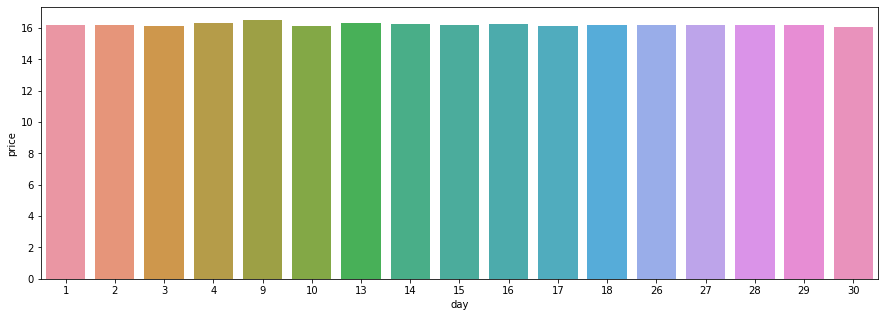

In [ ]:
# Average price of days
df.groupby('day')[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby('day')[['price']].mean(),
            x = df.groupby('day')[['price']].mean().index,
            y = 'price')

Average prices among dates is somewhat similar

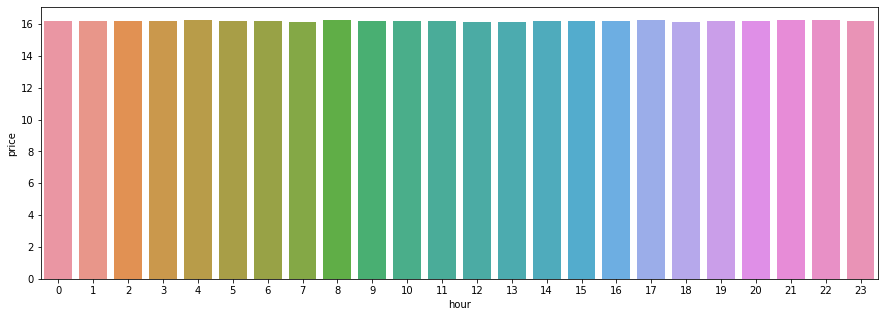

In [ ]:
# Average price of hours
df.groupby('hour')[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby('hour')[['price']].mean(),
            x = df.groupby('hour')[['price']].mean().index,
            y = 'price')

Similar to day average price, hourly average price is similar throughout

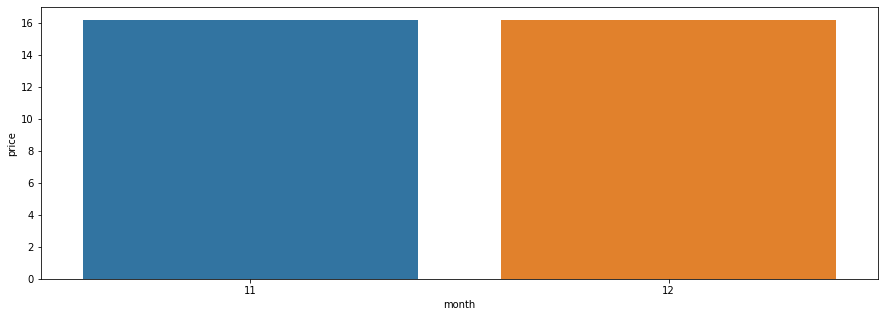

In [ ]:
# Average revenue by month
df.groupby('month')[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby('month')[['price']].mean(),
            x = df.groupby('month')[['price']].mean().index,
            y = 'price')

Average price between the 2 months is also the same

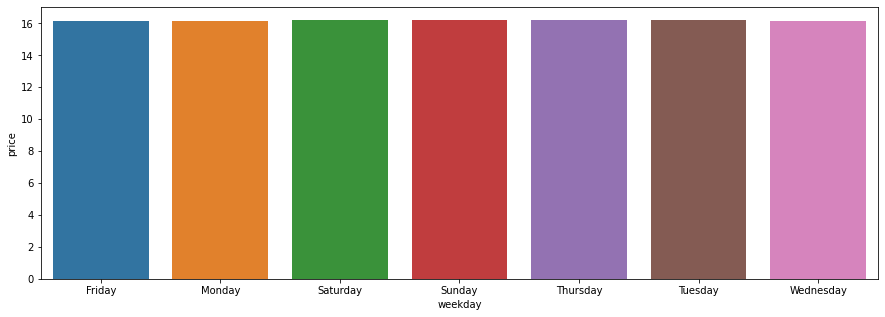

In [ ]:
# Average revenue by weekday
df.groupby('weekday')[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby('weekday')[['price']].mean(),
            x = df.groupby('weekday')[['price']].mean().index,
            y = 'price')

Same average price patterns also appear on weekdays

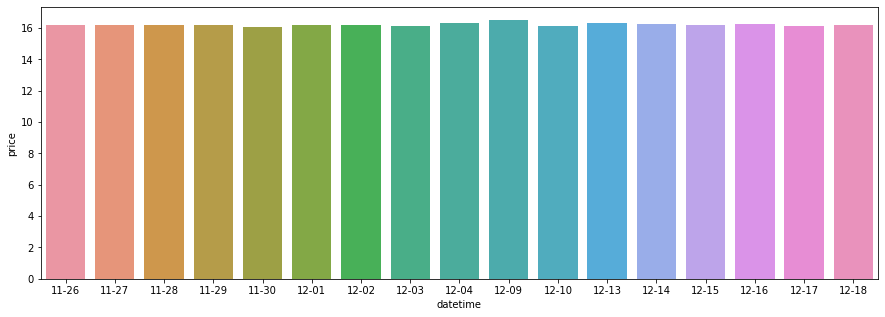

In [ ]:
# Average revenue by day of the month
df.groupby(df['datetime'].dt.strftime('%m-%d'))[['price']].mean().reset_index()


plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby(df['datetime'].dt.strftime('%m-%d'))[['price']].mean().reset_index(),
            x = 'datetime',
            y = 'price')

The average revenue of day of the months follow the same trend of similar averages

It seems data contain only date from 26 November to 18 October, with missing data in between the dates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

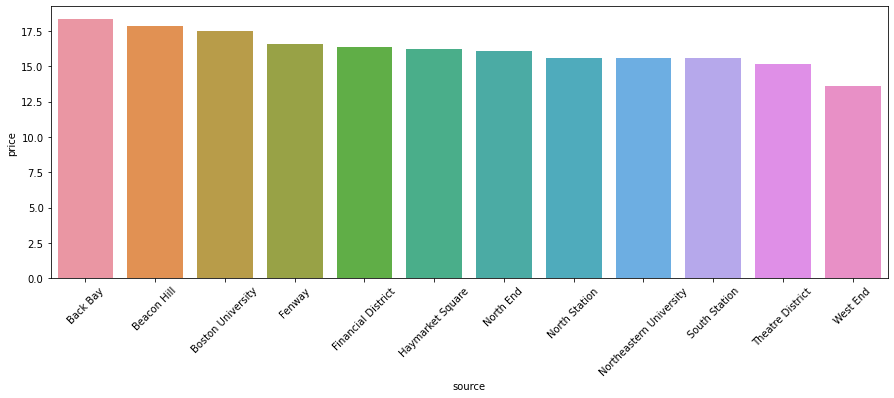

In [ ]:
# Check price with source location
df.groupby(['source'])[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby(['source'])[['price']].mean().sort_values(by = 'price', ascending = False),
            x = df.groupby(['source'])[['price']].mean().index,
            y = 'price')
plt.xticks(rotation = 45)

Pick up locations somewhat similar, with slight increase in price in Back Bay
West End seems to have the lowest price average among the pick up locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

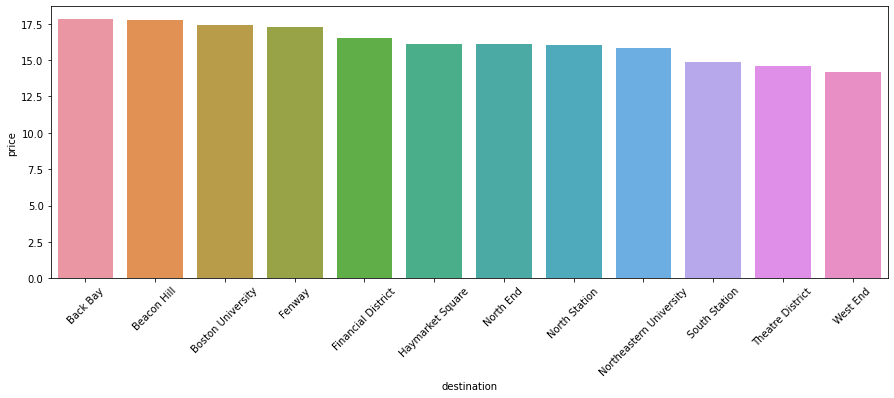

In [ ]:
# Check price with destination location
df.groupby(['destination'])[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby(['destination'])[['price']].mean().sort_values(by = 'price', ascending = False),
            x = df.groupby(['destination'])[['price']].mean().index,
            y = 'price')
plt.xticks(rotation = 45)

Similar to price and source, the average in price of destination location is somewhat similar, but with slight increase in Back Bay and slight decrease in West End

Text(0.5, 1.0, 'Distance')

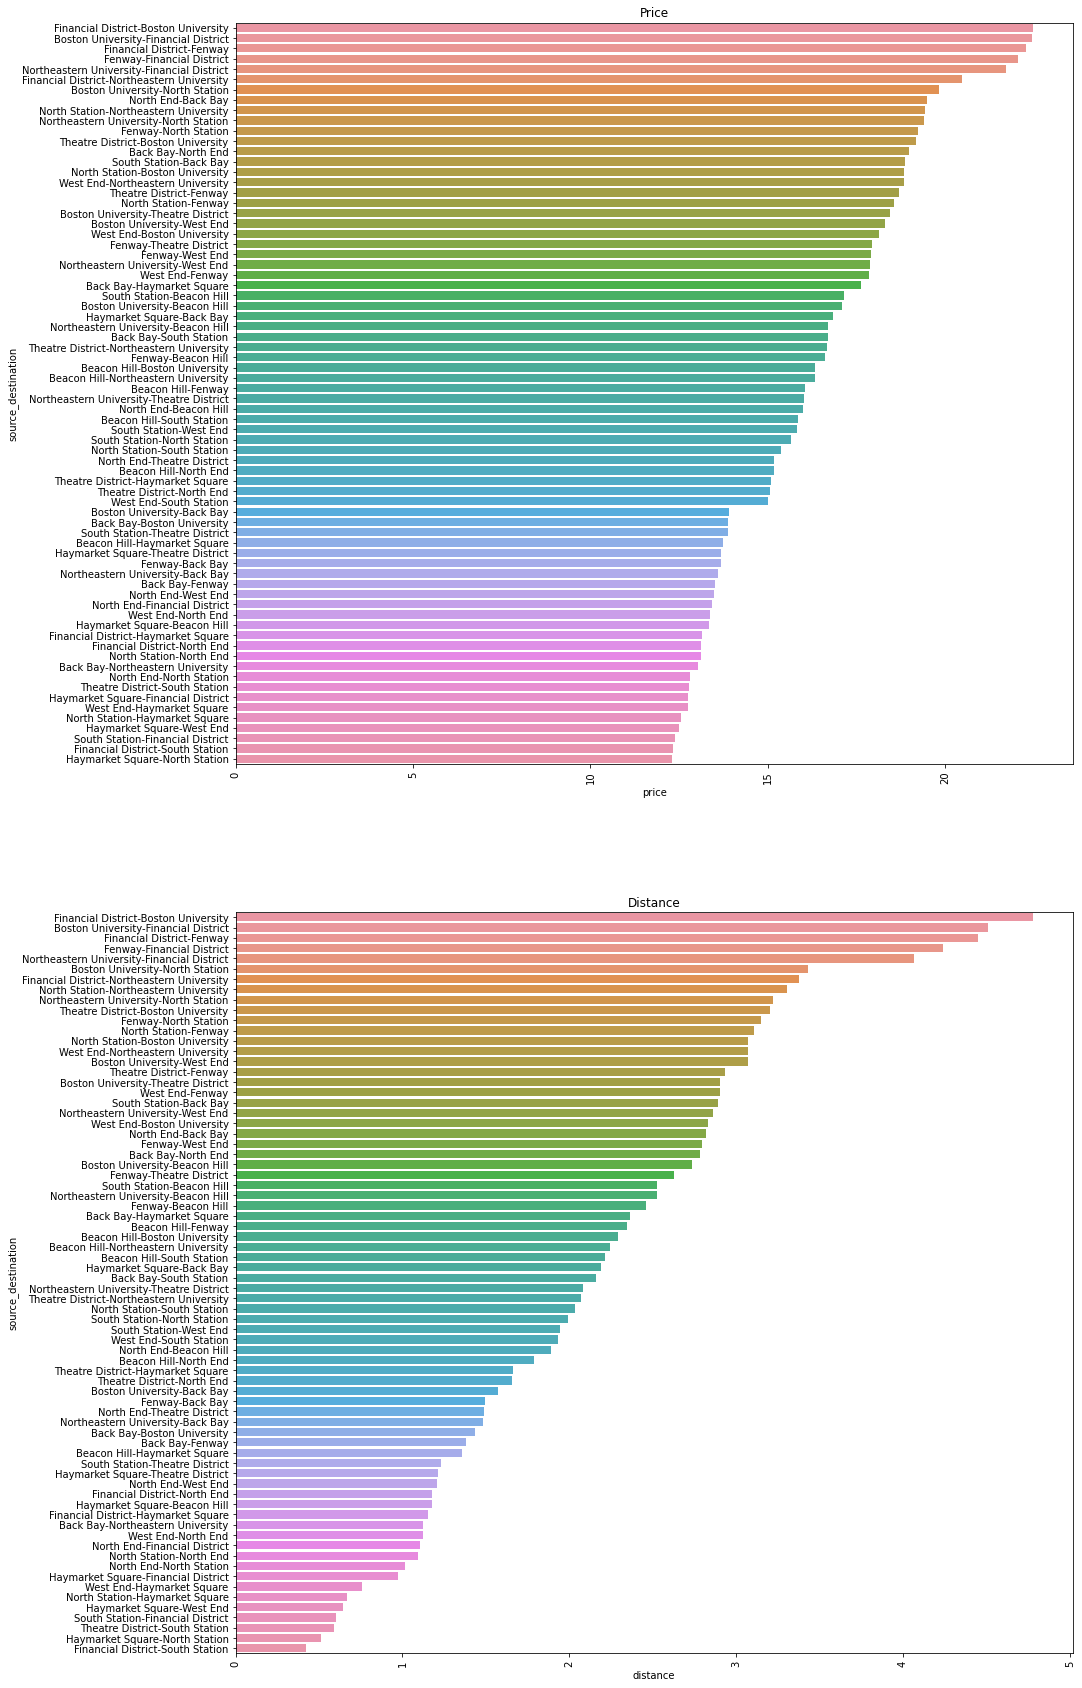

In [ ]:
# source-destination pair aaverage price
src_des = df.groupby(['source', 'destination'])[['price','distance']].mean().reset_index()
src_des['source_destination'] = src_des['source'] + '-' + src_des['destination']

plt.figure(figsize = (15,30))
plt.subplot(211)
sns.barplot(data = src_des.sort_values(by = 'price', ascending = False),
            x = 'price',
            y = 'source_destination',
            orient = 'h')
plt.xticks(rotation = 90)
plt.title('Price')

plt.subplot(212)
sns.barplot(data = src_des.sort_values(by = 'distance', ascending = False).sort_values(by = 'distance', ascending = False),
            x = 'distance',
            y = 'source_destination',
            orient = 'h')
plt.xticks(rotation = 90)
plt.title('Distance')

It seems that source and destination location have some connection to price.

Specifically, Financial District - Boston University source-destination pair (and vice versa) have the highest average price

Followed Fenway - Financial District pair (vice-versa) and Northeastern University - Financial District (vice-versa)

Based on the 'Distance' chart, these are also 3 highest distance, same for lowest 3

In [ ]:
# Check top 5 unique source destination
scr_list = src_des.sort_values(by = 'price', ascending = False)[0:5]['source'].unique()
des_list = src_des.sort_values(by = 'price', ascending = False)[0:5]['destination'].unique()
print(list(set(scr_list) &  set(des_list)))

['Fenway', 'Financial District', 'Boston University']


The combinations of Financial District, Boston University, and Fenway have the highest average price

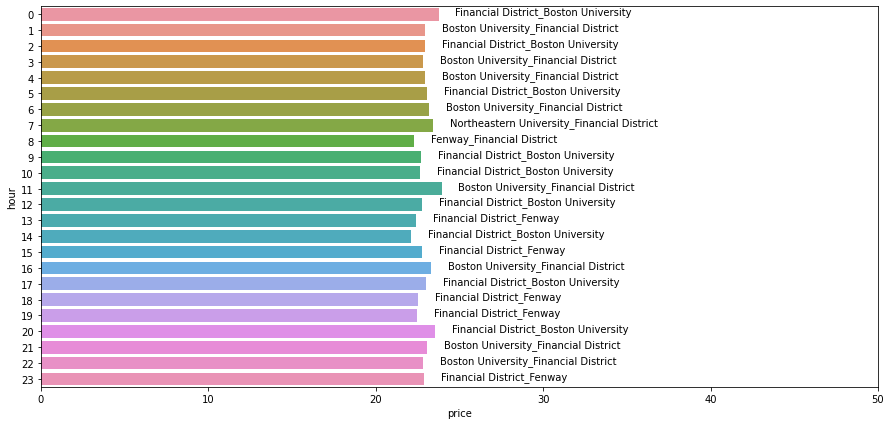

In [ ]:
# Highest average price of pair source-destination on hour
src_des_hour = df.groupby(['hour', 'source', 'destination'])[['price']].mean().reset_index()
src_des_hour_max = src_des_hour[src_des_hour.groupby('hour')['price'].transform(max) == src_des_hour['price']].set_index('hour')
src_des_hour_max['source_destination'] = src_des_hour_max['source'] + '_' + src_des_hour_max['destination']

plt.figure(figsize = (15,7))
sns.barplot(data = src_des_hour_max,
            y = src_des_hour_max.index,
            x = 'price',
            orient = 'h')
plt.xlim(0,50)
for x in src_des_hour_max.index:
  plt.text(y = x,
           x = src_des_hour_max.loc[x, 'price'] + 1,
           s = src_des_hour_max.loc[x, 'source_destination'],
           ha = 'left')

Highest price per hour seems similar across the hours, with slightly higer price with the Financial District - Boston University pair(vice - versa)

In [ ]:
print(list(set(src_des_hour_max['source'].unique()) & set(src_des_hour_max['destination'].unique())))

['Fenway', 'Financial District', 'Boston University']


Similarly, at any given hours, combination of Financial District, Fenway, and Boston have the highest price

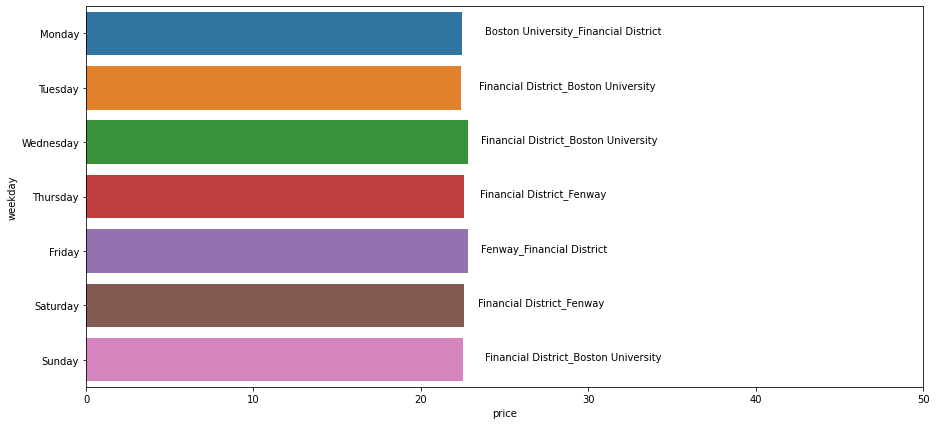

In [ ]:
# Highest average price of pair source-destination on weekday
src_des_wd = df.groupby(['weekday', 'source', 'destination'])[['price']].mean().reset_index()
src_des_wd_max = src_des_wd[src_des_wd.groupby('weekday')['price'].transform(max) == src_des_wd['price']].set_index('weekday')
src_des_wd_max['source_destination'] = src_des_wd_max['source'] + '_' + src_des_wd_max['destination']

plt.figure(figsize = (15,7))
sns.barplot(data = src_des_wd_max,
            y = src_des_wd_max.index,
            x = 'price',
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            orient = 'h')
plt.xlim(0,50)
for i in range(len(src_des_wd_max.index)):
  plt.text(y = i,
           x = src_des_wd_max.loc[src_des_wd_max.index[i], 'price'] + 1,
           s = src_des_wd_max.loc[src_des_wd_max.index[i], 'source_destination'],
           ha = 'left')

Same as hourly, combination of Financial District, Fenway, and Boston have the highest price

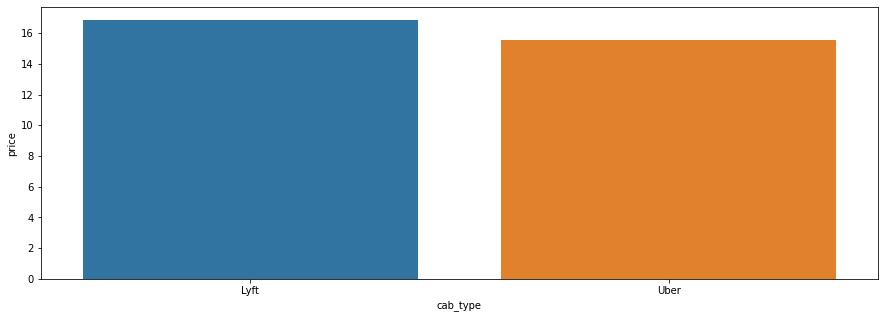

In [ ]:
# Check price difference between brand
df.groupby('cab_type')[['price']].mean()

plt.figure(figsize = (15,5))
sns.barplot(data = df.groupby('cab_type')[['price']].mean(),
            x = df.groupby('cab_type')[['price']].mean().index,
            y = 'price')

Lyft is slightly more pricy compare to Uber

In [ ]:
df_uber = df[df['cab_type'] == 'Uber']
df_lyft = df[df['cab_type'] == 'Lyft']

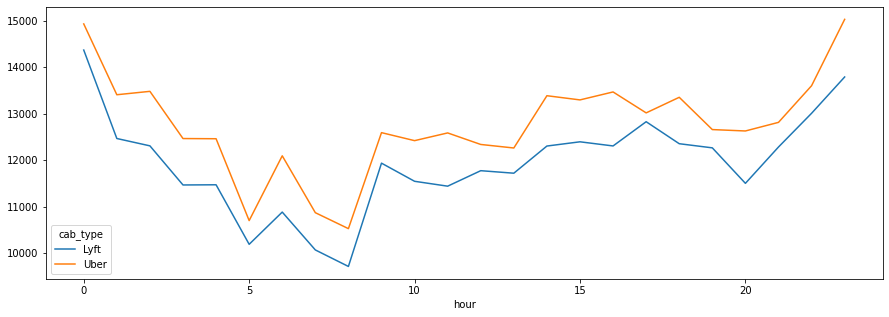

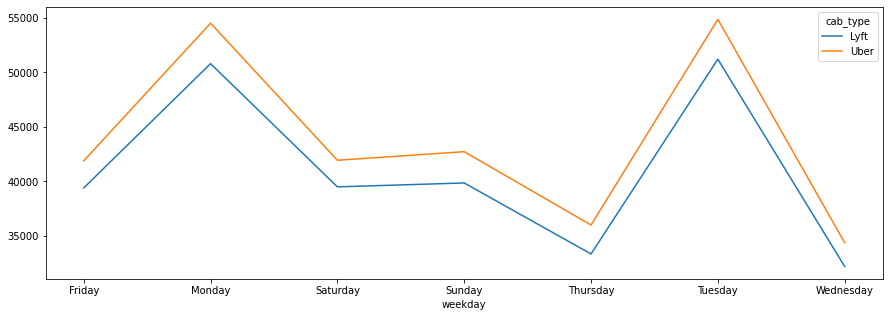

In [ ]:
# Does hour/day/weekday driven affect pricing of both brand
pd.pivot_table(data = df,
               columns = 'cab_type',
               index = 'hour',
               values = 'id',
               aggfunc = 'count').plot(kind = 'line', figsize = (15,5))
plt.show()

pd.pivot_table(data = df,
               columns = 'cab_type',
               index = 'weekday',
               values = 'id',
               aggfunc = 'count').plot(kind = 'line', figsize = (15,5))
plt.show()

(0.0, 25.0)

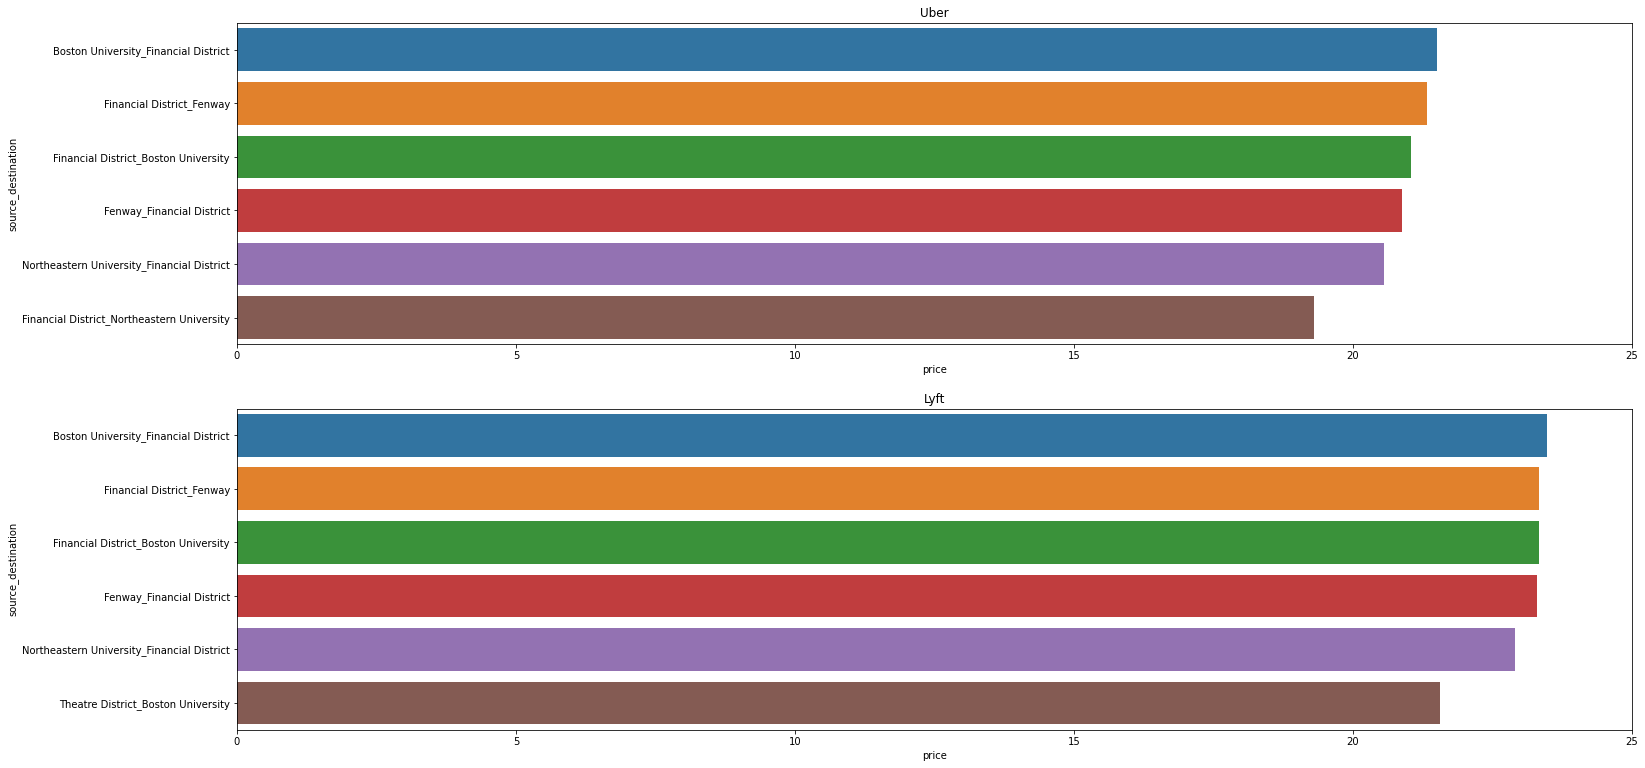

In [ ]:
# At what source and destination is Uber or Lyft is the priciest
uber_src_des_group = df_uber.groupby(['source', 'destination'])[['price']].mean().sort_values(by = 'price', ascending = False).reset_index()
uber_src_des_group['source_destination'] = uber_src_des_group['source'] + '_' + uber_src_des_group['destination'] 
uber_src_des_group_max = uber_src_des_group.loc[:5, :]

lyft_src_des_group = df_lyft.groupby(['source', 'destination'])[['price']].mean().sort_values(by = 'price', ascending = False).reset_index()
lyft_src_des_group['source_destination'] = lyft_src_des_group['source'] + '_' + lyft_src_des_group['destination'] 
lyft_src_des_group_max = lyft_src_des_group.loc[:5, :]

plt.figure(figsize = (25,13))

plt.subplot(211)
sns.barplot(data = uber_src_des_group_max,
            x = 'price',
            y = 'source_destination')
plt.title('Uber')
plt.xlim(0,25)

plt.subplot(212)
sns.barplot(data = lyft_src_des_group_max,
            x = 'price',
            y = 'source_destination')
plt.title('Lyft')
plt.xlim(0,25)

Similar to each other, the top 3 highest priced pair of source and location of both Uber and Lyft is, which involves, Financial District, Boston University and Fenway, with Lyft has slightly higher price for each pair

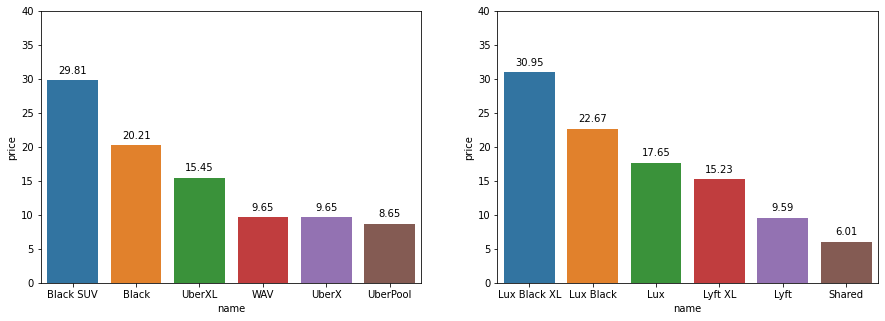

In [ ]:
group_uber = df_uber.groupby('name')[['price']].mean().sort_values(by = 'price', ascending = False)
group_lyft = df_lyft.groupby('name')[['price']].mean().sort_values(by = 'price', ascending = False)

df.groupby(['cab_type','name'])[['price']].mean().sort_values(by = 'price', ascending = False)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.barplot(data = group_uber,
            x = group_uber.index,
            y = 'price')
plt.ylim(0,40)
for x in range(len(group_uber.index)):
  plt.text(x = x,
            y = group_uber.loc[group_uber.index[x], 'price'] + 1,
          s = round(group_uber.loc[group_uber.index[x], 'price'],2),
          ha = 'center')

plt.subplot(122)
sns.barplot(data = group_lyft,
            x = group_lyft.index,
            y = 'price')
plt.ylim(0,40)
for x in range(len(group_lyft.index)):
  plt.text(x = x,
            y = group_lyft.loc[group_lyft.index[x], 'price'] + 1,
          s = round(group_lyft.loc[group_lyft.index[x], 'price'],2),
          ha = 'center')

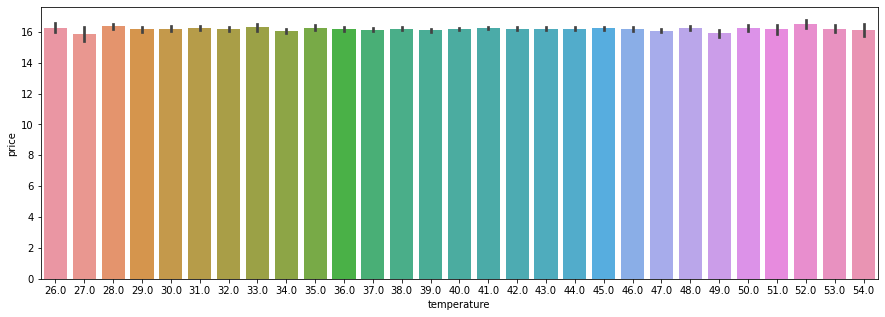

In [ ]:
# Temp and price relations
plt.figure(figsize = (15,5))
sns.barplot(data = df,
            x = 'temperature',
            y = 'price')

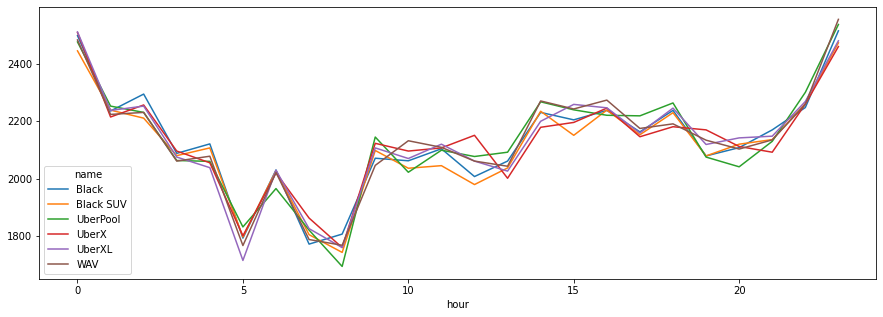

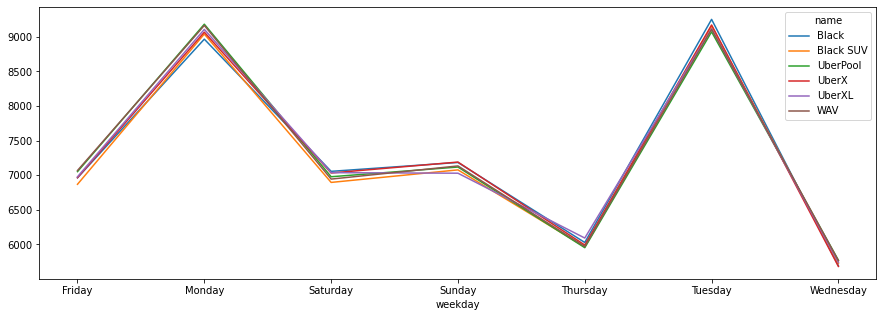

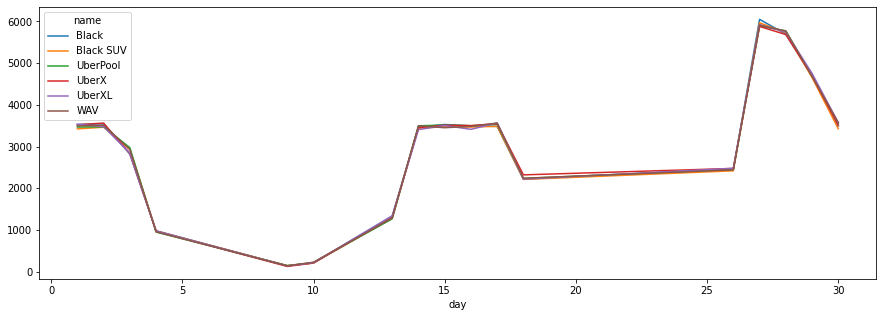

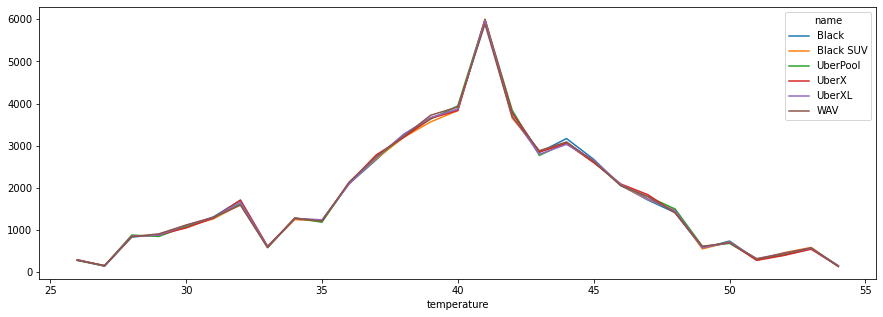

In [ ]:
# Does working hours affect the pricing of each ride
pd.pivot_table(data = df_uber,
               index = 'hour',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_uber,
               index = 'weekday',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_uber,
               index = 'day',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_uber,
               index = 'temperature',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

All the subcategories operate hours and temperatures seems identical to each other, suggests working hours do not determine price

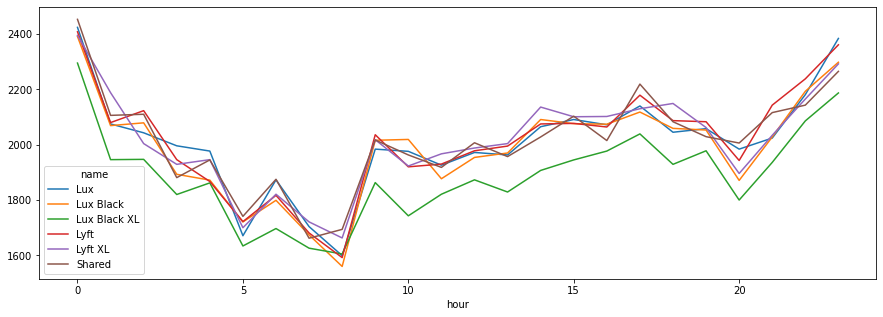

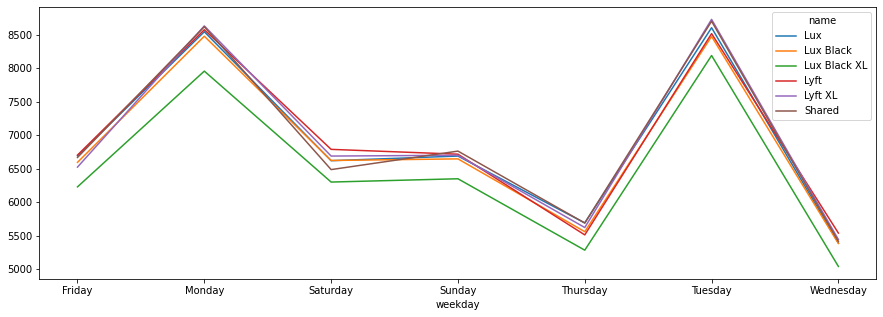

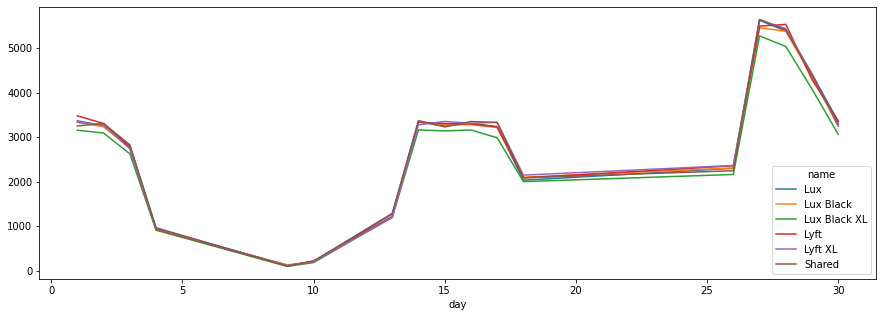

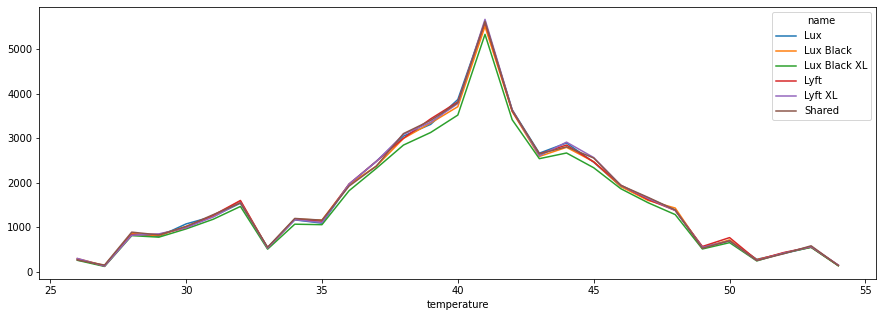

In [ ]:
# Does working hours affect the pricing of each ride
pd.pivot_table(data = df_lyft,
               index = 'hour',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_lyft,
               index = 'weekday',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_lyft,
               index = 'day',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

pd.pivot_table(data = df_lyft,
               index = 'temperature',
               columns = 'name',
               values = 'id',
               aggfunc = 'count').plot(figsize = (15,5))
plt.show()

Conclusion: The element affect price is distance, other than that, there are no indications of why the price of different categories is different in both Uber and Lyft

Same situation with Lyft

# Data modelling

## Price prediction using Linear Regression

### Preprocessing

In [ ]:
data.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

In [ ]:
# It seems that the column elimnated initially for EDA have no signifcant correlation to the target: Price
df.corr()

,hour,day,month,distance,price,surge_multiplier,temperature
hour,1.000000,0.073198,-0.077178,0.002079,0.000540,0.000045,0.199282
day,0.073198,1.000000,-0.864860,-0.002602,-0.001606,0.001420,-0.122091
month,-0.077178,-0.864860,1.000000,0.003650,0.001956,-0.000198,-0.001256
distance,0.002079,-0.002602,0.003650,1.000000,0.318393,0.013338,-0.003851
price,0.000540,-0.001606,0.001956,0.318393,1.000000,0.142790,0.000122
surge_multiplier,0.000045,0.001420,-0.000198,0.013338,0.142790,1.000000,0.000043
temperature,0.199282,-0.122091,-0.001256,-0.003851,0.000122,0.000043,1.000000


In [ ]:
# Only distance have moderate correlation to price
new_df = df.drop(columns = ['surge_multiplier', 'temperature'])
new_df.head()

,id,hour,day,month,datetime,source,destination,cab_type,name,distance,price,short_summary,long_summary,weekday
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,5.0,Mostly Cloudy,Rain throughout the day.,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,11.0,Rain,"Rain until morning, starting again in the eve...",Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0,Clear,Light rain in the morning.,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0,Clear,Partly cloudy throughout the day.,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0,Partly Cloudy,Mostly cloudy throughout the day.,Thursday


In [ ]:
from sklearn import preprocessing

In [ ]:
# All initial categorical variables
cat_col = [x for x in data.columns if data[x].dtypes == 'O']
cat_col

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [ ]:
# Seperate categorical only df
df_cat = data[cat_col + ['price']].copy()
df_cat.head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,price
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,5.0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain,11.0
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night,7.0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night,26.0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,9.0


In [ ]:
# Encode categorical variable to check correlation with target
le = preprocessing.LabelEncoder()
for x in cat_col:
  df_cat[x] = le.fit_transform(df_cat[x])

In [ ]:
df_cat

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,price
0,179271,25351,0,5,7,0,8,7,4,9,5,5.0
1,205021,961,0,5,7,0,12,2,8,10,6,11.0
2,411506,2534,0,5,7,0,7,5,0,2,1,7.0
3,527263,6988,0,5,7,0,10,4,0,6,1,26.0
4,606526,4400,0,5,7,0,11,6,6,4,5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,263466,11456,0,11,6,1,3,11,6,1,5,13.0
693067,268325,11456,0,11,6,1,0,10,6,1,5,9.5
693068,272709,11456,0,11,6,1,4,8,6,1,5,NaN
693069,309823,11456,0,11,6,1,2,1,6,1,5,27.0


In [ ]:
df_cat.corr()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,price
id,1.000000,0.001070,NaN,-0.001737,-0.000106,-0.001917,0.002042,-0.000951,-0.003021,0.000363,-0.000825,0.001137
datetime,0.001070,1.000000,NaN,0.000379,-0.001345,0.000679,-0.001002,0.001204,-0.056805,-0.013243,-0.154747,0.000403
timezone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,-0.001737,0.000379,NaN,1.000000,-0.007584,0.000912,-0.000789,0.000335,-0.000642,-0.000972,-0.003292,-0.025366
destination,-0.000106,-0.001345,NaN,-0.007584,1.000000,0.000835,-0.000723,0.000307,-0.003483,-0.000211,-0.004879,-0.046320
cab_type,-0.001917,0.000679,NaN,0.000912,0.000835,1.000000,-0.864673,0.366068,-0.000458,0.001620,0.002268,-0.083385
product_id,0.002042,-0.001002,NaN,-0.000789,-0.000723,-0.864673,1.000000,-0.186493,-0.000013,-0.001285,-0.002494,0.067795
name,-0.000951,0.001204,NaN,0.000335,0.000307,0.366068,-0.186493,1.000000,-0.001197,-0.000202,-0.000893,-0.579046
short_summary,-0.003021,-0.056805,NaN,-0.000642,-0.003483,-0.000458,-0.000013,-0.001197,1.000000,0.093459,0.449836,0.001245
long_summary,0.000363,-0.013243,NaN,-0.000972,-0.000211,0.001620,-0.001285,-0.000202,0.093459,1.000000,-0.010451,0.000396


In [ ]:
# It seems that only 'name' column has noticeable correlation to price
# And that some of the categorical variables eliminated for the EDA have no correlation to the target variable
# Because during EDA, a new column weekday is created, check for correlation
# Further more, during EDA, the combination of source-destination seems to have affected the price, add this column to check for corr as well

# Add source_destination column
new_df['source_destination'] = new_df['source'] + '_' + new_df['destination'] 

cat_col_new = [x for x in new_df.columns if new_df[x].dtypes == 'O']
new_df_cat = new_df[cat_col_new + ['price']]
for x in cat_col_new:
  new_df_cat[x] = le.fit_transform(new_df_cat[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
new_df_cat.head()

,id,source,destination,cab_type,name,short_summary,long_summary,weekday,source_destination,price
0,153350,5,7,0,7,4,9,3,33,5.0
1,175388,5,7,0,2,8,10,5,33,11.0
2,352079,5,7,0,5,0,2,6,33,7.0
3,450901,5,7,0,4,0,6,0,33,26.0
4,518646,5,7,0,6,6,4,4,33,9.0


In [ ]:
new_df_cat.corr()

,id,source,destination,cab_type,name,short_summary,long_summary,weekday,source_destination,price
id,1.000000,-0.002075,-0.000277,-0.002123,-0.000533,-0.003176,0.000886,-0.001339,-0.002070,0.000031
source,-0.002075,1.000000,-0.007047,0.003681,0.000185,-0.000304,-0.000724,-0.002825,0.996655,-0.012761
destination,-0.000277,-0.007047,1.000000,-0.000366,-0.001259,-0.005557,0.000139,-0.000047,0.071565,-0.038705
cab_type,-0.002123,0.003681,-0.000366,1.000000,0.285888,-0.001305,0.001591,0.000855,0.003587,-0.074839
name,-0.000533,0.000185,-0.001259,0.285888,1.000000,-0.000756,-0.000652,-0.001182,0.000061,-0.608842
short_summary,-0.003176,-0.000304,-0.005557,-0.001305,-0.000756,1.000000,0.126738,0.233378,-0.000807,0.001242
long_summary,0.000886,-0.000724,0.000139,0.001591,-0.000652,0.126738,1.000000,-0.116332,-0.000700,0.000911
weekday,-0.001339,-0.002825,-0.000047,0.000855,-0.001182,0.233378,-0.116332,1.000000,-0.002836,0.002444
source_destination,-0.002070,0.996655,0.071565,0.003587,0.000061,-0.000807,-0.000700,-0.002836,1.000000,-0.016759
price,0.000031,-0.012761,-0.038705,-0.074839,-0.608842,0.001242,0.000911,0.002444,-0.016759,1.000000


In [ ]:
# Again only 'name' column has noticeable correlation with price
new_df

,id,hour,day,month,datetime,source,destination,cab_type,name,distance,price,short_summary,long_summary,weekday,source_destination
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,5.0,Mostly Cloudy,Rain throughout the day.,Sunday,Haymarket Square_North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,11.0,Rain,"Rain until morning, starting again in the eve...",Tuesday,Haymarket Square_North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,7.0,Clear,Light rain in the morning.,Wednesday,Haymarket Square_North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,26.0,Clear,Partly cloudy throughout the day.,Friday,Haymarket Square_North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,0.44,9.0,Partly Cloudy,Mostly cloudy throughout the day.,Thursday,Haymarket Square_North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,WAV,1.00,9.5,Partly Cloudy,Light rain in the morning and overnight.,Saturday,West End_North End
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,1.00,13.0,Partly Cloudy,Light rain in the morning and overnight.,Saturday,West End_North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,1.00,9.5,Partly Cloudy,Light rain in the morning and overnight.,Saturday,West End_North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,1.00,27.0,Partly Cloudy,Light rain in the morning and overnight.,Saturday,West End_North End


In [ ]:
new_df = new_df[['name', 'distance', 'price']]
new_df.head()

,name,distance,price
0,Shared,0.44,5.0
1,Lux,0.44,11.0
2,Lyft,0.44,7.0
3,Lux Black XL,0.44,26.0
4,Lyft XL,0.44,9.0


In [ ]:
# Data encoding
def one_hot_encoder(data, feature, keep_first = False):
  '''
  data: input dataframe
  feature: feature to one hot,
  keep_first: keep the original feature after one hot or not
  '''
  one_hot_df = pd.get_dummies(data[feature])
  new_data = pd.concat([data, one_hot_df], axis = 1)
  if keep_first == True:
    return new_data
  else:
    return new_data.iloc[:, 1:]
new_df_onehot = one_hot_encoder(new_df, 'name')
display(new_df_onehot)

,distance,price,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,5.0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,11.0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,7.0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,26.0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,9.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,9.5,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,13.0,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,9.5,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,27.0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dataset split
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns = 'price').values
y = new_df_onehot['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Modelling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Check accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9203144138289138

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.103039310495378
2.470433020847839
